In [27]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

from sklearn.metrics import r2_score
import os
import subprocess

class my_model(BaseEstimator):

    #def __init__(self):
     #   self.demo_param = demo_param

    def fit(self, X, y):

        # Check that X and y have correct shape
        #X, y = check_X_y(X, y)
        # Store the classes seen during fit
        #self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    

        
        
    def predict(self, X):
        inputs = len(X[0])
        outputs = 1
        y = self.y_
        with open('temp.data', 'w') as csvfile:
            csvfile.write(str(inputs) + "," + str(outputs)+","+ str(len(X)) +",\n")
            for xx, yy in zip(X, y):
                zz = [*xx, yy]
                line = str(zz)[1:-1]+",\n"
                csvfile.write(line)
        proc = subprocess.Popen(['simple_get_y', 'temp.data', 'train10.data'], stdout=subprocess.PIPE)
        val = proc.communicate()[0].decode("utf-8")
        split_val = [float(s) for s in val.split()]
        
        return np.asarray(split_val)
    
    def score(self, X, y):
        return sum(self.predict(X)-y)/len(y)
        

In [28]:
X = np.load('X_big.npy')
y = np.load('y_big.npy')

In [29]:
z = [[[(lambda i: xx+0.1*k if i % 5 ==1 and i < 125 else xx)(i) for i, xx in enumerate(x)] for x in X] for k in range(20)]

In [30]:
model = my_model().fit(X,y)
canon = model.predict(X)
errors = []
for zz in z:
    model = my_model().fit(zz,canon)
    pred_y = model.predict(zz)
    errors.append(model.score(zz,canon))
    

In [31]:
errors

[0.0,
 0.10000000000000693,
 0.1999999999999943,
 0.3000000000000113,
 0.3999999999999886,
 0.5,
 0.6000000000000207,
 0.700000000000021,
 0.7999999999999772,
 0.9000000000000153,
 1.0,
 1.0999999999999739,
 1.2000000000000313,
 1.2999999999999727,
 1.400000000000042,
 1.5,
 1.599999999999954,
 1.6999999999999789,
 1.8000000000000307,
 1.9000000000000552]

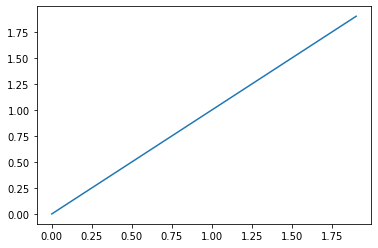

In [32]:
import matplotlib.pyplot as plt


x = np.arange(0,2.0, 0.1)
plt.plot(x,errors )
plt.show()

In [20]:
z = [[[(lambda i: xx+0.1*k if i % 5 ==2 and i < 125 else xx)(i) for i, xx in enumerate(x)] for x in X] for k in range(20)]

In [33]:
for zz in z:
    model = my_model().fit(zz,canon)
    pred_y = model.predict(zz)
    print(model.score(zz,canon))
    

0.0
0.10000000000000693
0.1999999999999943
0.3000000000000113
0.3999999999999886
0.5
0.6000000000000207
0.700000000000021
0.7999999999999772
0.9000000000000153
1.0
1.0999999999999739
1.2000000000000313
1.2999999999999727
1.400000000000042
1.5
1.599999999999954
1.6999999999999789
1.8000000000000307
1.9000000000000552


In [23]:
test = [1,2,3,4]
for t in test:
    t= 5

In [24]:
test

[1, 2, 3, 4]